# The wonderful world of Fibonacci

By Adriana Ladera and Jefferson Taylor Jr.

You've probably heard other nerds talk about the beauty of the Fibonacci sequence. It's a phenomenon that occurs in the arrangement of pine cone petals, sunflower seeds, and even in music!

The formula to obtain the Fibonacci sequence is as follows:

$F_n = F_{n-1} + F_{n-2}$

Starting from 0.

Perhaps one of the most common ways to visualize the Fibonacci sequence is via the spiral, which is what we'll do here!

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle, accumulate
from functools import reduce
from operator import mul, add

# cyclic sequence
X = [-1, 1, 1, -1]
Y = [-1, -1, 1, 1]

## Generating Fibonacci numbers and coordinates

fib_nums generates a list of Fibonacci numbers and fib_coords turns the sequence into a list of coordinates

In [3]:
def fib_nums(n: int) -> list[int]:
    """Generates sequence of Fibonacci numbers into a list

    Parameters
    ----------
    n : int
        Size of Fibonacci list to generate
    
    Returns
    -------
    list
        List of Fibonacci numbers
    """
    sequence = [0, 1]
    for _ in range(2,n):
        sequence.append(sequence[-1] + sequence[-2])

    return sequence

def fib_coords(fib_sequence: list[int]) -> list[tuple[int, int]]:
    """Generates list of (x, y) coordinates based on the fibonacci sequence list

    Parameters
    ----------
    fib_sequence : list[int]
        Sequence of Fibonacci ints in a list

    Returns
    -------
    list
        A list of tuples with (x, y) coordinates
    """
    def axis(c: list[int]):
        """Generates a list for the X or Y axis

        Parameters
        ----------
        c : list[int]
            Cycle for determining positive or negative product
        """
        z = zip(fib_sequence, cycle(c))
        r = [reduce(mul, t) for t in z]
        return accumulate(r, add)
    
    return list(zip(axis(X), axis(Y)))

## Now we shall plot ze spiral muahahah >:D

Plotting the spiral requires a bit of unit circle geometry and finding missing points. But have no fear, the math is quite simple!

First, we iterate through the Fibonacci numbers that we obtained above, and then map those to the cyclic sequence (X and Y above) accordingly. 

The square of a Fibonacci number encases a quarter circle with four possible cases. The list of coordinates can also be used to create start points $(S_x, S_y)$ and end points $(E_x, E_y)$ for the arc to be traced, as well as the centers C:

- if X = Y: center = $(E_x, S_y)$
- if X $\neq$: center = $(S_x, E_y)$

We use the cases of the cyclic pairs (X,Y) to determine which quadrant of the unit circle will be used:
- if (X,Y) $\rightarrow$ (+,+):$~~\theta = [0, \frac{\pi}{2}]$
- if (X,Y) $\rightarrow$ (-,+):$~~\theta = [ \frac{\pi}{2}, \pi]$
- if (X,Y) $\rightarrow$ (-,-):$~~\theta = [\pi, \frac{3\pi}{2}]$
- if (X,Y) $\rightarrow$ (+,-):$~~\theta = [ \frac{3\pi}{2}, 2\pi]$

To plot the square of the Fibonacci number that encases the half circle, we use the points S, E, and C to obtain the final point F of the square. The distance from S to C should equal those from S to E and C to F:

- $\vec{SC} \leftarrow (S_x - C_x, S_y, C_y)$
- $\vec{EC} \leftarrow (E_x - C_x, E_y, C_y)$

The final point can be found by translating S by the vector $\vec{EC}$:

- $F \leftarrow (S_x + \vec{EC}_x, S_y, \vec{EC}_y)$

Put this all together and voila! You have yourself a Fibonacci spiral!

In [4]:
def plot_fibonacci(n):
    '''Plots the Fibonacci spiral for n Fibonacci numbers.
    n --> int: total amount of Fibonacci numbers'''

    fuck, ax = plt.subplots(1, figsize=(8,8), dpi=600)

    fib_points = fib_coords(fib_nums(n))
    cunt = 1
    for i in range(len(fib_points)):
        if i % 4 == 0:
            cunt = 0 # resetting cyclic sequence
        if i >= 0 and i + 1 < len(fib_points):
            start_point = fib_points[i]
            end_point = fib_points[i+1]

            # choosing center points
            if X[cunt] == Y[cunt]:
                center = (end_point[0], start_point[1]) 
            else:
                center = (start_point[0], end_point[1]) 

            # unit circle range
            if X[cunt] > 0 and Y[cunt] > 0: # + + 
                theta = np.linspace(0, np.pi / 2, 100)
            elif X[cunt] < 0 and Y[cunt] > 0: # - + 
                theta = np.linspace(np.pi / 2, np.pi, 100)
            elif X[cunt] < 0 and Y[cunt] < 0: # - - 
                theta = np.linspace(np.pi, 3*np.pi / 2, 100)
            elif X[cunt] > 0 and Y[cunt] < 0: # + -
                theta = np.linspace(3*np.pi / 2, 2*np.pi, 100)
            
            # get the radius
            radius = np.sqrt((start_point[0] - center[0])**2 + (start_point[1] - center[1])**2)

            # calculate the x and y coordinates of the quarter circle
            x = center[0] + radius * np.cos(theta)
            y = center[1] + radius * np.sin(theta)

            # getting stuff for the square
            end_center = (end_point[0] - center[0], end_point[1] - center[1])
            last_point = (start_point[0] + end_center[0], start_point[1] + end_center[1])
            square_points = [center, start_point, last_point, end_point, center]
            x_coords, y_coords = zip(*square_points)

            # plotting
            ax.plot(x_coords, y_coords, color='#000000') # square
            ax.plot(x,y, color='r') # quarter circle

            ax.set_aspect('equal', adjustable='box')
        
        cunt += 1
        
    plt.show()

## Plot the spiral!

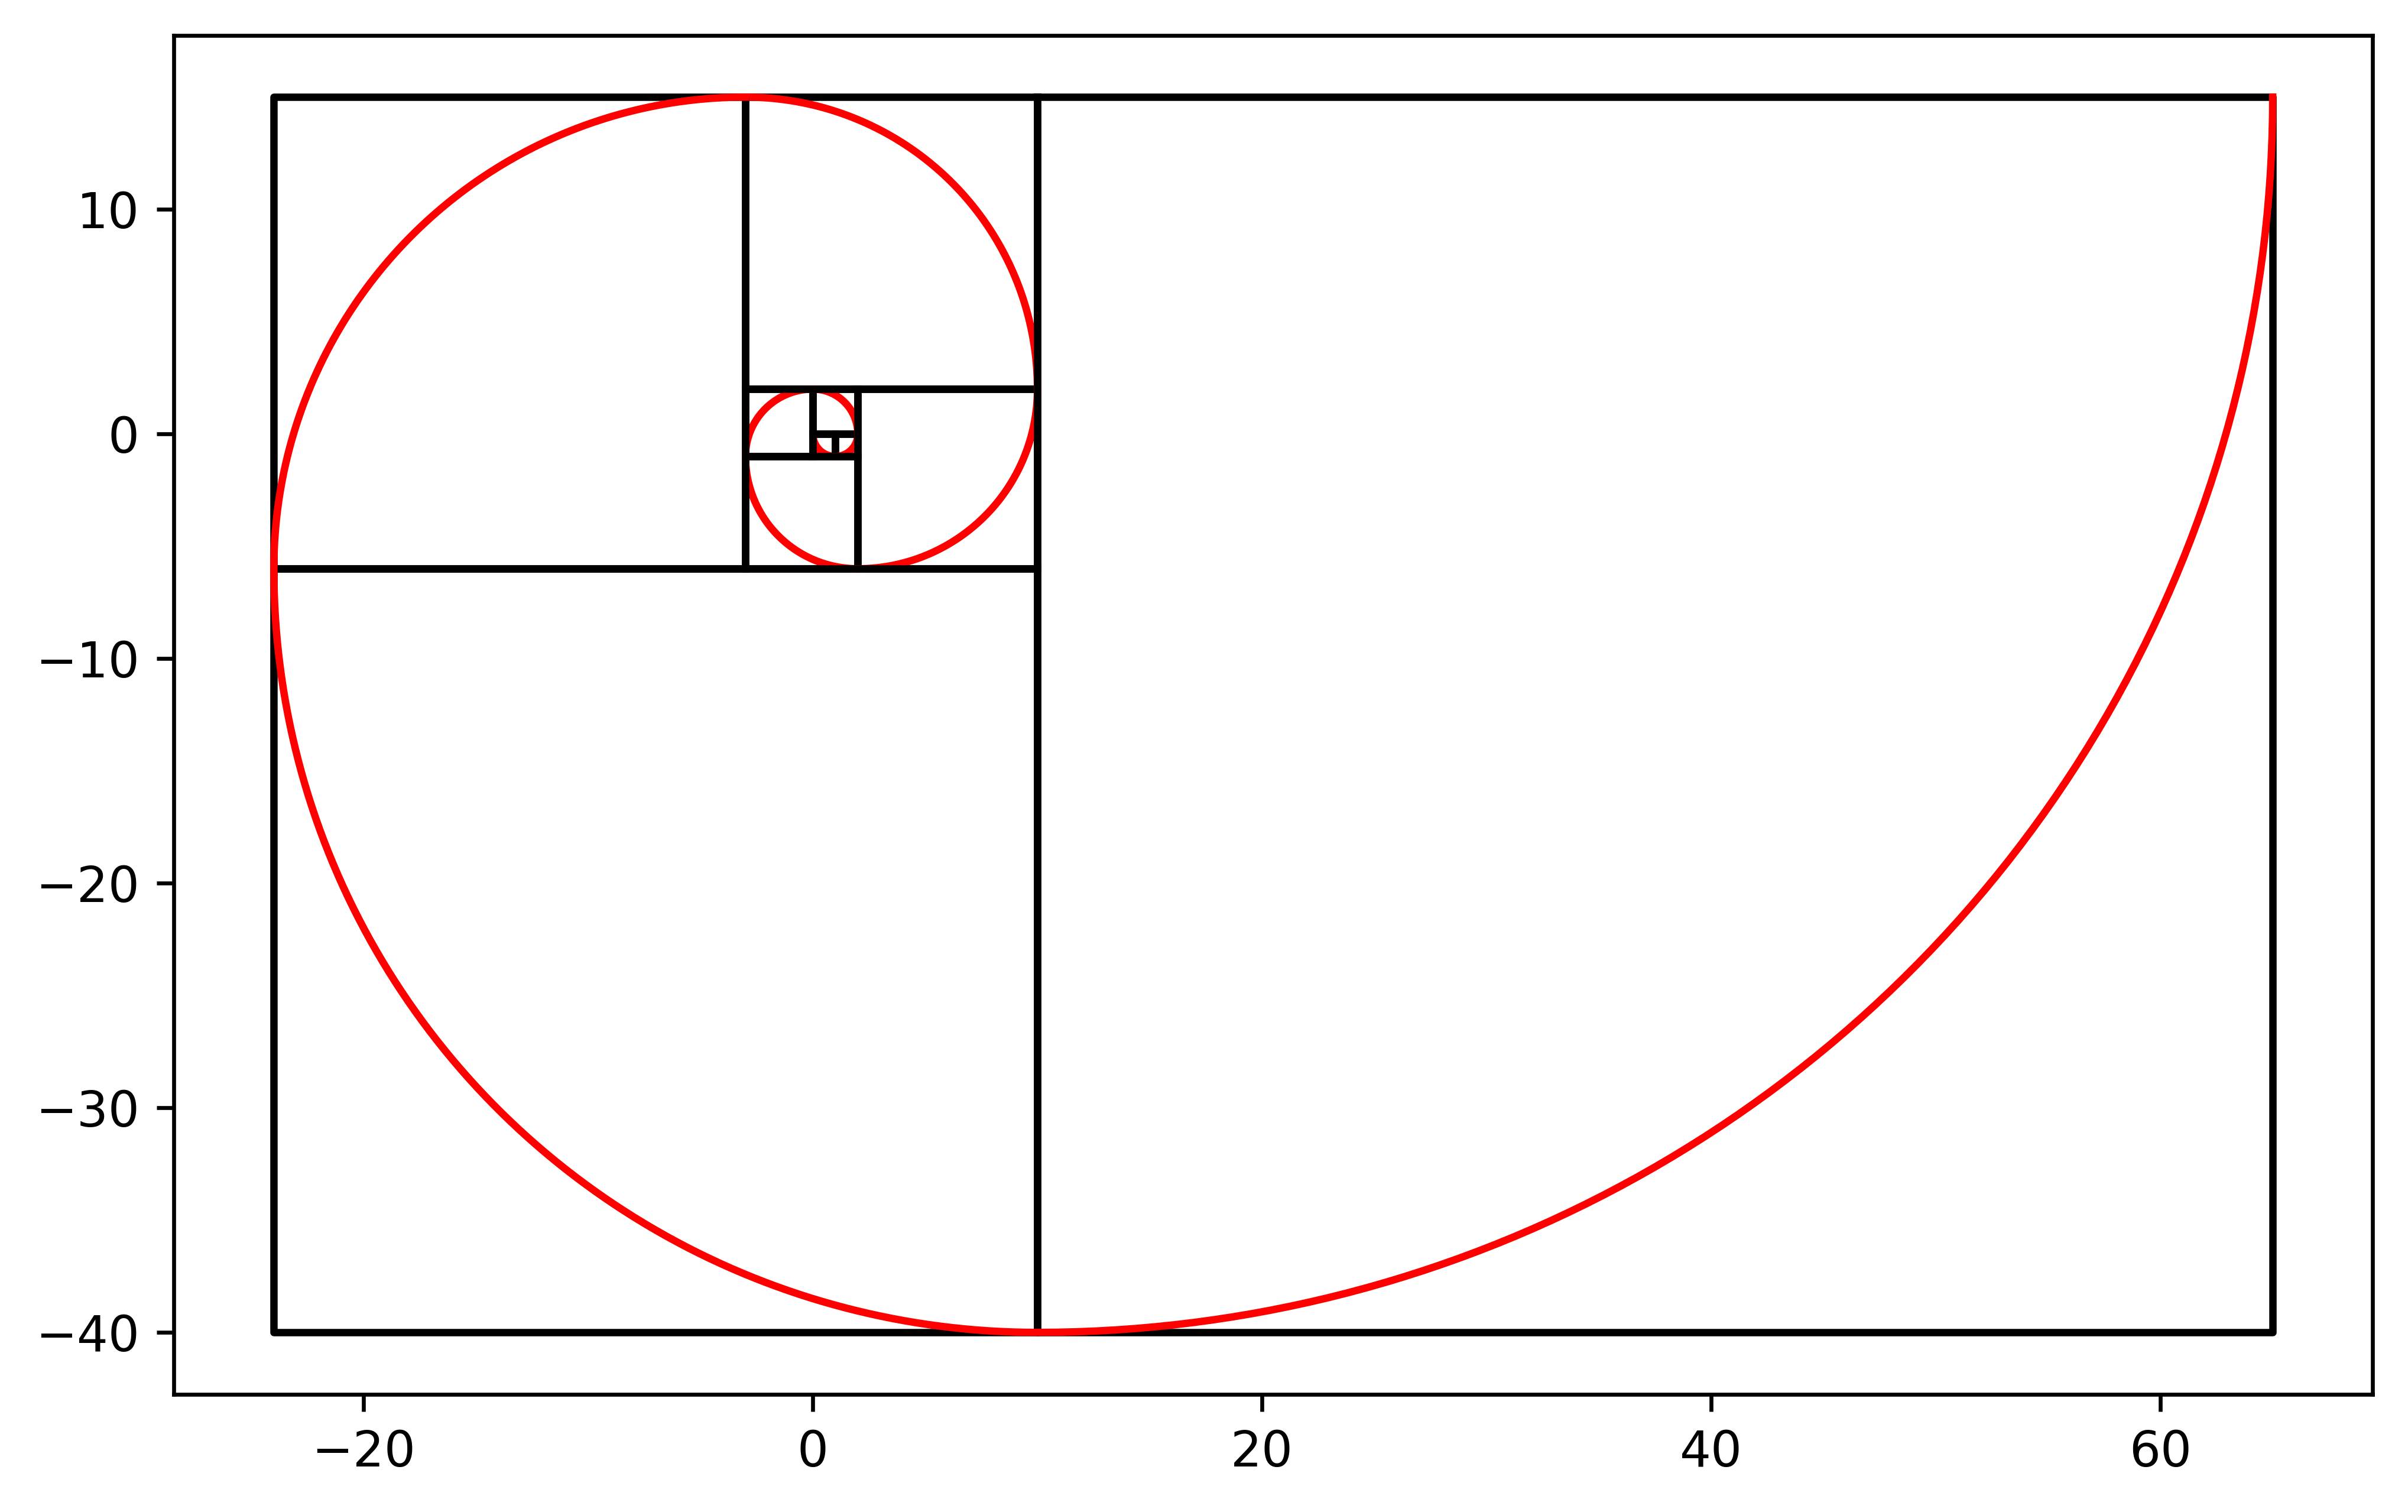

In [7]:
plot_fibonacci(round(4.20 + 6.9)) # the golden ratio

## See the values

What are those Fibonacci numbers you wanted?

In [6]:
fib_nums(round(4.20 + 6.9))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]